<a href="https://colab.research.google.com/github/farrukh61/Insurance-Charges-prediction/blob/main/Insurance%20Charges%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

# matplotlib.rcParams['figure.figsize'] = (20,10)

In [ ]:
df1 = pd.read_csv('insurance.csv')

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df1.shape

(1338, 7)

# Exploring the features

In [ ]:
df1.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Six unique regions

In [ ]:
df1.groupby('region')['region'].agg('count')

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

In [ ]:
df1.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [ ]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
df1.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

# Data Cleaning

In [ ]:
## Check for Null data
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in given data

# Conversion:categorical Data into numerical data

Considering above exploration, there seem no expceptions in the given data

In [ ]:
## using dummy variables

In [ ]:

dummy = pd.get_dummies(df1[['sex', 'smoker', 'region']], columns=['sex', 'smoker', 'region'],drop_first=True)
dummy.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [ ]:
df2 = pd.concat([df1,dummy],axis = 1)

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [ ]:
df2.isnull().any()

age                 False
sex                 False
bmi                 False
children            False
smoker              False
region              False
charges             False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [ ]:
df3 = df2.drop(['sex','smoker','region'],axis = 1)

In [ ]:
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Data Visulizaiontion

Below we visualize the non categorical data (age, bmi, children ) to observe the distribution

In [ ]:
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Text(0.5, 0, 'Children')

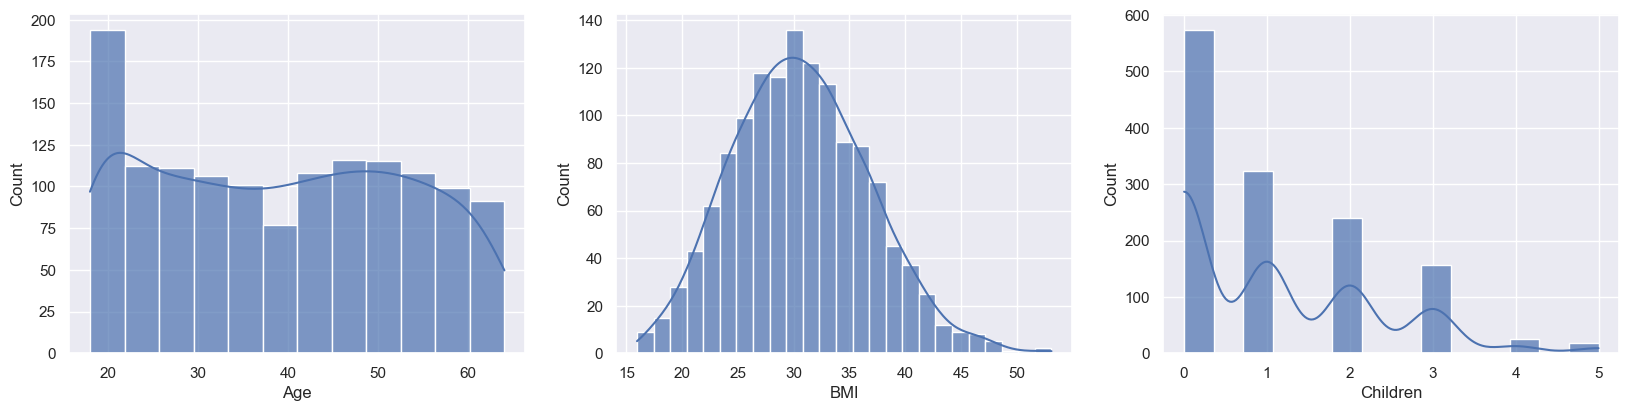

In [ ]:
sns.set()
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.histplot(df3.age, color = 'b',kde=True,alpha=0.7); plt.xlabel('Age')
plt.subplot(3,3,2)
sns.histplot(df3.bmi,color = 'b',kde=True,alpha=0.7); plt.xlabel('BMI')
plt.subplot(3,3,3)
sns.histplot(df3.children,color = 'b',kde=True,alpha=0.7); plt.xlabel('Children')


### Heat Map

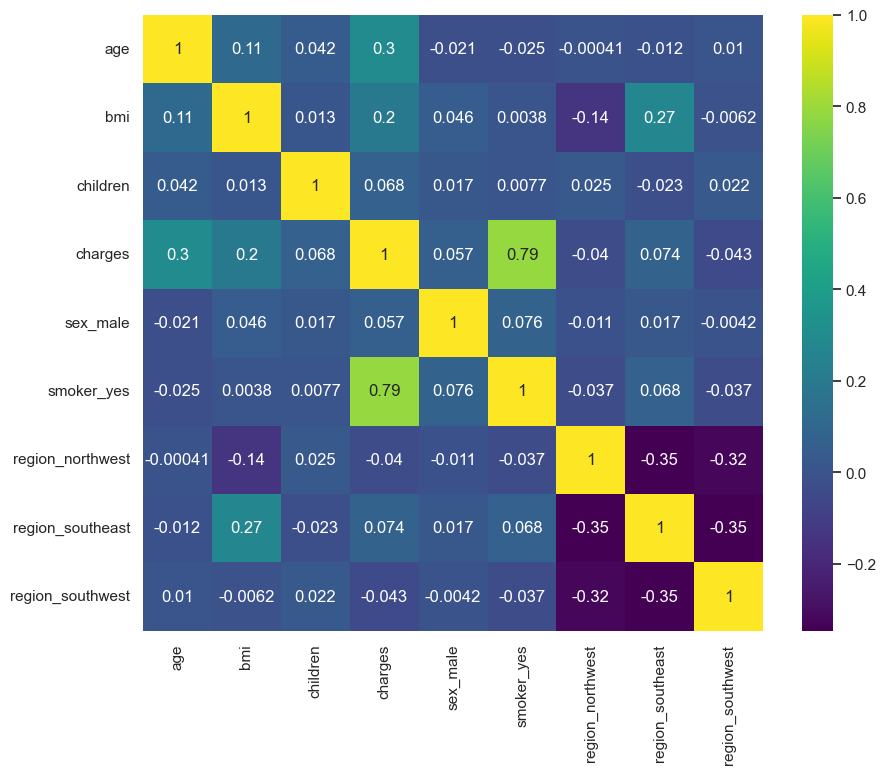

In [ ]:
# display the correlation matrix in the heatmap, it will help in feature selection
corr = df3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True,cmap='viridis');

### Skewnesss and its removal

In [ ]:
from scipy.stats import skew

In [ ]:
skew_dict = {}
for col in df3:
    skewness = skew(df3[col])
    skew_dict[col] = skewness
   
skew_df = pd.DataFrame.from_dict(skew_dict, orient='index', columns=['Skewness'])

In [ ]:
type(skew_df)

pandas.core.frame.DataFrame

In [ ]:
corr_skew = pd.concat([corr,skew_df],axis=1)
corr_skew

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Skewness
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016,0.055610
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205,0.283729
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914,0.937328
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210,1.514180
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184,-0.020928
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945,1.463124
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829,1.199063
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265,1.024471
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000,1.199063


From the above data frame, it is obvious that 'children' has littel correlation with 'charges' but highly skewed. Since 'children' contains count data, so right now we keep as it is.

### Deviding the data into features (x) and tartget (y)

In [ ]:
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
#Features
x = df3.drop('charges',axis=1)
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [ ]:
# Target
y=df3['charges']

In [ ]:
y.shape

(1338,)

### Deviding into Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

### Normalization of Data

In [ ]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_ss = scaler.fit_transform(x_train)
x_test_ss = scaler.fit_transform(x_test)


In [ ]:
# MinMax
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
x_train_mm=scal.fit_transform(x_train)
x_test_mm=scal.fit_transform(x_test)



# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
l_rg = LinearRegression(verbose = True)
## with standard scalar scaling
l_rg.fit(x_train_ss,y_train)


TypeError: __init__() got an unexpected keyword argument 'verbose'

In [ ]:
l_rg.score(x_test_ss,y_test)

0.7694284637867439

In [ ]:
## with min max scaling
l_rg.fit(x_train_mm,y_train)

LinearRegression()

In [ ]:
l_rg.score(x_test_mm,y_test)

0.769394771886804

In [ ]:
## without scaling

In [ ]:
l_rg.fit(x_train,y_train)

LinearRegression()

In [ ]:
l_rg.score(x_test,y_test)

0.7696118054369012

In [ ]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(x_train_mm,y_train)

SGDRegressor()

In [ ]:
regressor.score(x_test_mm,y_test)

0.7699138233702864